In [1]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter




In [2]:
fn.importtest()

The module has been succesfully imported.


## Importing the Franke Function

In [3]:
datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x,y = np.meshgrid(x,y)
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)

## Creating the "dataset" to be the x and y values to be two features ravelled

In [4]:
X = np.array([np.ravel(x), np.ravel(y)])
z = z.reshape(1,datapoints**2) # Reshaping the ground truth to be able to fit through the network.

# Setting up the neural network

In [7]:
NNreg = fn.NN(layer_dims=[X.shape[0],10,10,1], hidden_layers=['sigmoid','sigmoid','linear'],
           batch_size = 32, max_epoch=1000, verbose=0, learning_rate=0.01)


# Fitting the model

In [8]:
NNreg.fit(X, z)

Text(0.5, 0, 'Iterations')

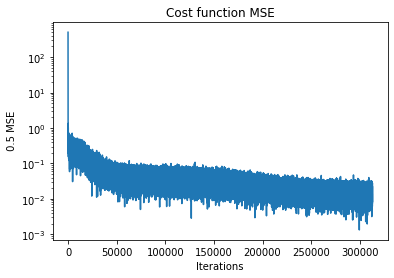

In [9]:
plt.plot(NNreg.costs)
plt.yscale("log")
plt.title("Cost function MSE")
plt.ylabel(" 0.5 MSE")
plt.xlabel("Iterations")

In [10]:
print(np.min(NNreg.costs))

0.0013312223119689068


# Predicting

In [11]:
z_pred = NNreg.predict(X)

##  Plotting the prediciton

In [12]:
z_pred_surf = z_pred.reshape(datapoints,datapoints)

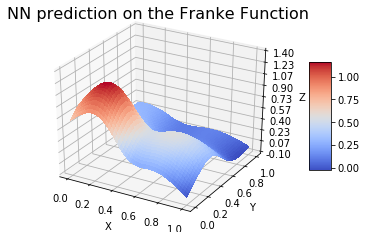

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z_pred_surf, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

# Labeling the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("NN prediction on the Franke Function", fontsize = 16)
ax.set_zlim(-0.10, 1.40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# Regression class model

In [14]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [15]:
n = 5 # <--  Polynomial degree 
test_size = 0.2


datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x,y = np.meshgrid(x,y)
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)


In [16]:
# Creating design matrix and splitting into testing and training for the regression
X_train, X_test, z_train, z_test = train_test_split(fn.regressionX(x,y,n), z.reshape(-1), test_size = test_size)

In [17]:
regmodel = fn.Regression(X_train, z_train, n, method = ["OLS"], resampling = [("bootstrap"), 50] )

In [27]:
regmodel.fit(X_train, z_train)

Beta equals [-2.06739335e-02  1.10117387e+01  7.07584582e+00 -4.59363337e+01
 -2.51128957e+01 -1.95450836e+01  6.82753624e+01  6.28049645e+01
  3.55317144e+01  9.99769888e+00 -3.96905491e+01 -6.94824490e+01
 -2.06063156e+01 -4.03397858e+01  1.42169956e+01  6.38013469e+00
  2.41477708e+01  1.56967441e+01 -2.67141818e+00  2.00375708e+01
 -1.15926803e+01]


In [19]:
z_tilde = regmodel.predict(X_train)
z_pred = regmodel.predict(X_test)


In [21]:
MSE_train, R2_train = fn.scores(z_train,z_tilde)
MSE_test, R2_test = fn.scores(z_test,z_pred)

print("MSE for the training data = {}".format(MSE_train))
print("MSE for the testing data = {}".format(MSE_test))

MSE for the training data = 0.0024447981122023704
MSE for the testing data = 0.0022677505089442624


##  Plotting the prediciton

In [24]:
z_pred_surf = regmodel.predict(fn.regressionX(x,y,n)).reshape(datapoints,datapoints)

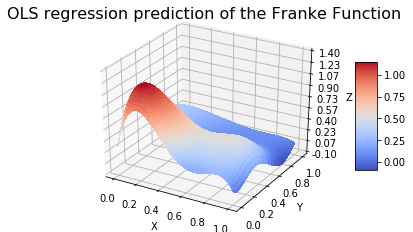

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z_pred_surf, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

# Labeling the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("OLS regression prediction of the Franke Function", fontsize = 16)
ax.set_zlim(-0.10, 1.40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
